# Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unique cases, Manufacturers, Malignant vs Benign

Total number of unique patients: 6000


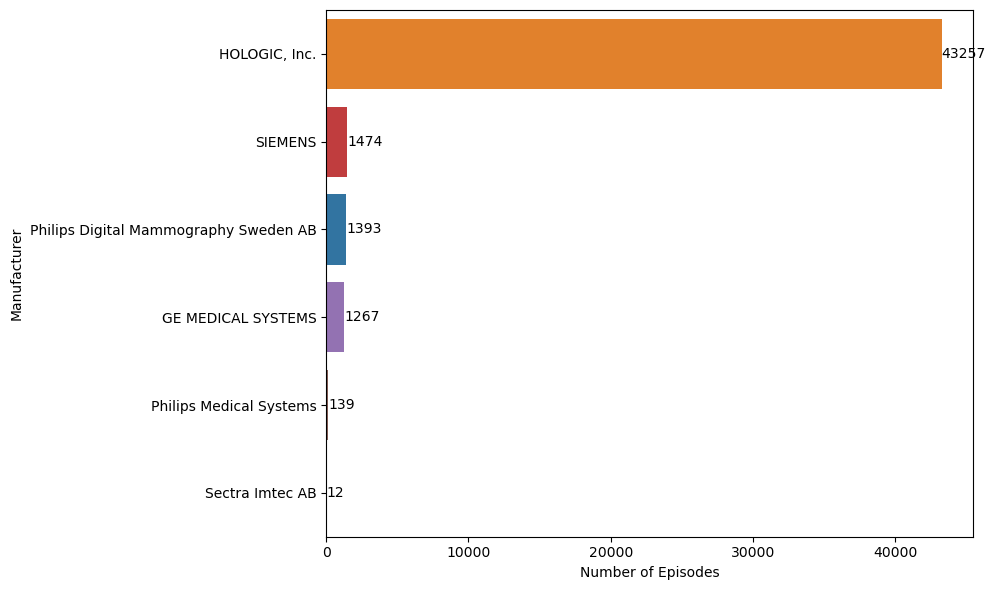

In [9]:
# Load the dataset
df = pd.read_csv('optimam_assets/client_images_screening.csv')

# Analysis of unique patients
unique_patients = df['client_id'].nunique()

print(f'Total number of unique patients: {unique_patients}')

# Analysis of episodes by Manufacturer
manufacturer_distribution = df['manufacturer'].value_counts()

# Distribution of Manufacturers with Counts
plt.figure(figsize=(10, 6))
sns_plot = sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index, hue='manufacturer', legend=False)
plt.xlabel('Number of Episodes')
plt.ylabel('Manufacturer')

# Adding the count on each bar
for p in sns_plot.patches:
    width = p.get_width()    # get bar length
    sns_plot.text(width + 1,  # set the text at 1 unit right of the bar
                  p.get_y() + p.get_height() / 2,  # get Y coordinate + half of bar width
                  '{:1.0f}'.format(width),  # set variable to display, 2 decimals
                  ha = 'left',   # horizontal alignment
                  va = 'center')  # vertical alignment

plt.tight_layout()
plt.savefig('manufacturer_distribution_with_counts.png')

# Malignant vs Benign (Hologic Inc.)

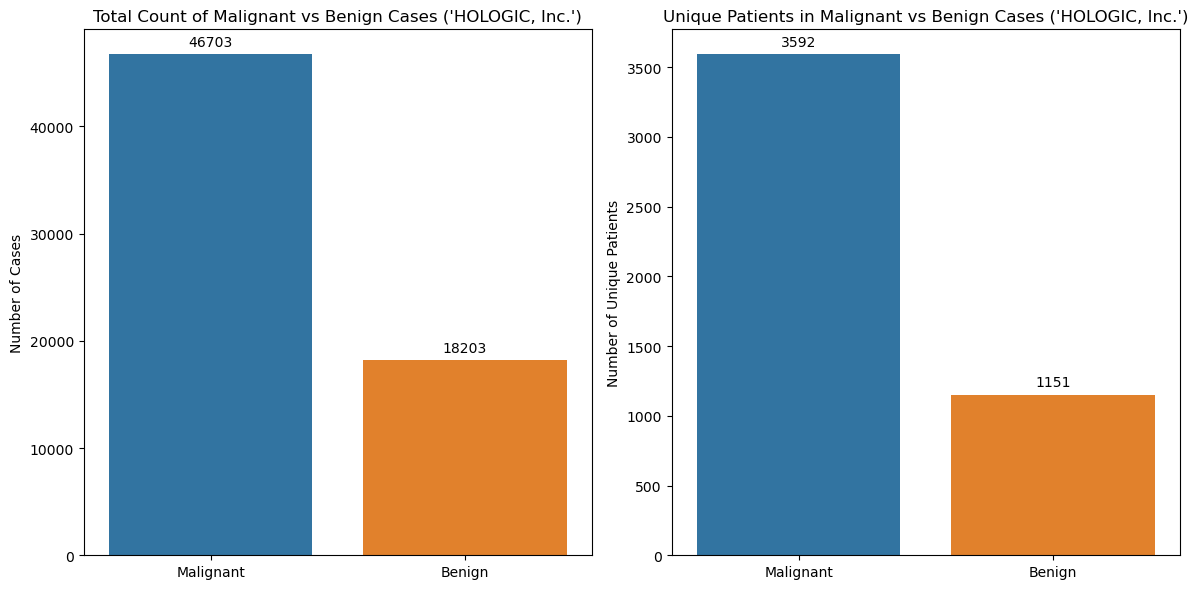

In [102]:
# Filtering the DataFrame for 'HOLOGIC, Inc.' manufacturer
hologic_df = df[df['Manufacturer'] == 'HOLOGIC, Inc.']

# Count of Malignant and Benign cases for 'HOLOGIC, Inc.' including unique patients
malignant_cases_hologic = hologic_df[hologic_df['EpisodeContainsMalignantOpinions'] == 1].shape[0]
benign_cases_hologic = hologic_df[hologic_df['EpisodeContainsBenignOpinions'] == 1].shape[0]
malignant_cases_unique_patients_hologic = hologic_df[hologic_df['EpisodeContainsMalignantOpinions'] == 1]['ClientID'].nunique()
benign_cases_unique_patients_hologic = hologic_df[hologic_df['EpisodeContainsBenignOpinions'] == 1]['ClientID'].nunique()

# Visualizations
plt.figure(figsize=(12, 6))

# Total Cases for 'HOLOGIC, Inc.'
plt.subplot(1, 2, 1)
total_cases_plot_hologic = sns.barplot(x=['Malignant', 'Benign'], y=[malignant_cases_hologic, benign_cases_hologic], hue=['Malignant', 'Benign'], legend=False)
plt.title("Total Count of Malignant vs Benign Cases ('HOLOGIC, Inc.')")
plt.ylabel('Number of Cases')

# Adding numbers on bars for Total Cases
for p in total_cases_plot_hologic.patches:
    total_cases_plot_hologic.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Unique Patients for 'HOLOGIC, Inc.'
plt.subplot(1, 2, 2)
unique_patients_plot_hologic = sns.barplot(x=['Malignant', 'Benign'], y=[malignant_cases_unique_patients_hologic, benign_cases_unique_patients_hologic], hue=['Malignant', 'Benign'], legend=False)
plt.title("Unique Patients in Malignant vs Benign Cases ('HOLOGIC, Inc.')")
plt.ylabel('Number of Unique Patients')

# Adding numbers on bars for Unique Patients
for p in unique_patients_plot_hologic.patches:
    unique_patients_plot_hologic.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
# plt.savefig('hologic_malignant_benign_cases_unique_patients_with_numbers.png')

# Total # of images with lesion coordinates

In [1]:
import pandas as pd
import os

base_path = '/'
csv_file = 'assets/client_images_screening.csv'

# Read CSV
df = pd.read_csv(csv_file)

# List all clients
client_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

# Variable to hold the total count of images with lesions
total_count = 0

for client_id in client_folders:
    # Filter data for the specific client
    client_data = df[df['client_id'] == client_id]

    # Increment the total count by the number of images with all four lesion coordinates for this client
    total_count += client_data.dropna(subset=['x1', 'x2', 'y1', 'y2']).shape[0]

# Display the total count
print(f"Total images with lesion coordinates across all clients: {total_count}")


Total images with lesion coordinates across all clients: 8481


# Total # of images with lesion coordinates (unique clients)

In [2]:
# List all unique clients
unique_clients = df['client_id'].unique()

# Variable to hold the total count of images with lesions
total_count = 0

for client_id in unique_clients:
    # Filter data for the specific client
    client_data = df[df['client_id'] == client_id]

    # Skip clients that already have a subset of lesion coordinates
    if client_data.dropna(subset=['x1', 'x2', 'y1', 'y2']).shape[0] > 0:
        # Increment the total count by the number of images with all four lesion coordinates for this client
        total_count += 1

# Display the total count
print(f"Total images with lesion coordinates across unique clients: {total_count}")

Total images with lesion coordinates across unique clients: 3975


In [4]:
csv_file = 'optimam_assets/client_images_screening.csv'

# Read CSV
df = pd.read_csv(csv_file)

df.describe()

,age,mark_id,x1,x2,y1,y2,magnification_factor,xmin_cropped,xmax_cropped,ymin_cropped,ymax_cropped
count,47542.000000,8481.000000,8481.000000,8481.000000,8481.000000,8481.000000,47542.000000,47542.000000,47542.000000,47542.000000,47542.000000
mean,59.415590,9359.772197,1390.187360,1651.633298,1636.534371,1883.478481,1.006035,654.059463,2281.874469,158.873354,3356.698772
std,7.536469,4995.789929,1009.366162,1017.864443,612.473634,625.571582,0.018733,741.850498,829.612653,226.109287,536.221616
min,36.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,358.000000,0.000000,1673.000000
25%,53.000000,5196.000000,494.000000,764.000000,1186.000000,1427.000000,1.000000,0.000000,1568.000000,12.000000,2995.000000
50%,59.000000,9468.000000,1302.000000,1598.000000,1571.000000,1826.000000,1.000000,0.000000,2560.000000,12.000000,3328.000000
75%,65.000000,13366.000000,2142.000000,2394.000000,2033.000000,2276.000000,1.000000,1293.000000,2560.000000,287.000000,3656.000000
max,88.000000,19044.000000,4829.000000,4915.000000,4428.000000,4851.000000,1.800000,3959.000000,4915.000000,1893.000000,5355.000000


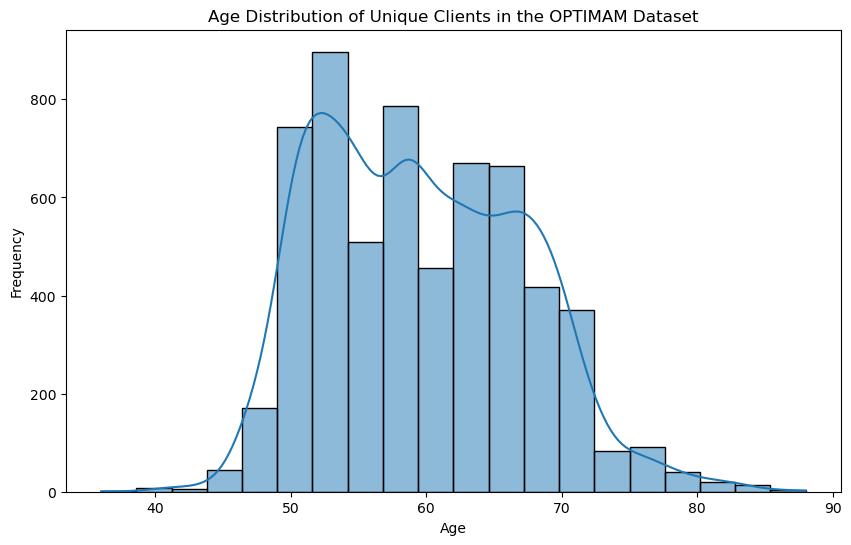

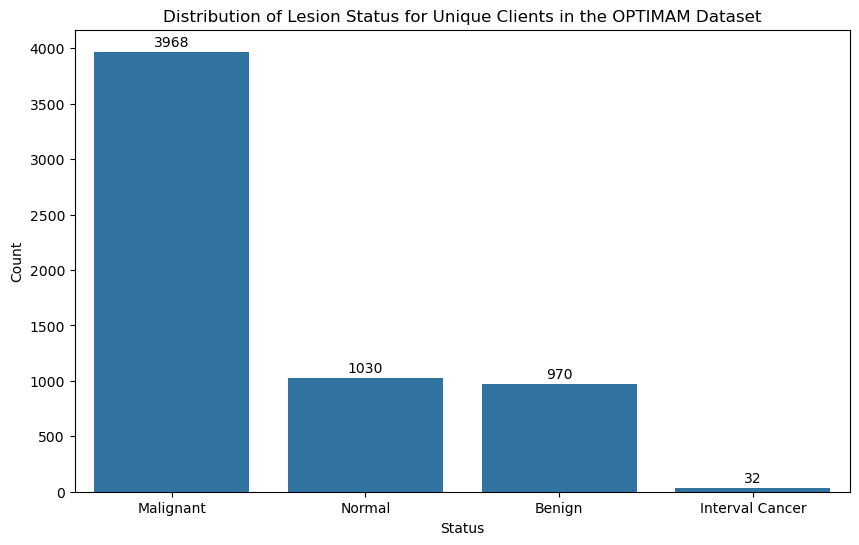

In [8]:
# Filter data to only unique clients
unique_clients = df.drop_duplicates(subset=['client_id'])

# Plot the distribution of patient age for unique clients
plt.figure(figsize=(10, 6))
sns.histplot(unique_clients['age'], bins=20, kde=True)
plt.title('Age Distribution of Unique Clients in the OPTIMAM Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of lesion status for unique clients
plt.figure(figsize=(10, 6))
unique_status_counts = unique_clients['status'].value_counts()
sns.barplot(x=unique_status_counts.index, y=unique_status_counts.values)
plt.title('Distribution of Lesion Status for Unique Clients in the OPTIMAM Dataset')
plt.xlabel('Status')
plt.ylabel('Count')
for i in range(len(unique_status_counts)):
    plt.text(i, unique_status_counts.values[i] + 50, unique_status_counts.values[i], ha='center')
plt.show()
